In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
df=pd.read_csv("GENEVA.csv")
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,53060989,https://www.airbnb.com/rooms/53060989,20220922191353,2022-09-22,previous scrape,Bnb2you Apartment with view near Geneva,Renovated luxury apartment overlooking the Jur...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,313578602,...,4.14,4.71,4.29,NaN,f,24,18,6,0,0.70
1,588150356748050196,https://www.airbnb.com/rooms/588150356748050196,20220922191353,2022-09-22,previous scrape,"Superbe, 50m de la frontière, résidence, parking",Très bel appartement avec terrasse de 25m2 et ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,46143912,...,NaN,NaN,NaN,NaN,f,30,28,2,0,NaN
2,593087126941169126,https://www.airbnb.com/rooms/593087126941169126,20220922191353,2022-09-22,previous scrape,Bnb2 You Private room n2 in roommate appartment,Private room in a 3-bedroom shared apartment. ...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,313578602,...,NaN,NaN,NaN,NaN,f,24,18,6,0,NaN
3,592692800643063760,https://www.airbnb.com/rooms/592692800643063760,20220922191353,2022-09-22,previous scrape,Bnb2you Private Room n1 In Coloc Design near,Private room in a 3-bedroom shared apartment. ...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,313578602,...,1.00,3.00,1.00,NaN,f,24,18,6,0,0.45
4,53636749,https://www.airbnb.com/rooms/53636749,20220922191353,2022-09-22,previous scrape,MajorBnB Well Located Deco Apartment near Geneva,Deco apartment well located in the city center...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,313578602,...,5.00,5.00,4.00,NaN,t,24,18,6,0,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3365,22745250,https://www.airbnb.com/rooms/22745250,20220922191353,2022-09-23,city scrape,Convenient spacious cosy appartement with balcony,"Appartement lumineux, spacieux et confortable ...",NaN,https://a0.muscache.com/pictures/8f9b04de-32db...,13027886,...,5.00,4.33,4.33,NaN,f,2,2,0,0,0.11
3366,709866,https://www.airbnb.com/rooms/709866,20220922191353,2022-09-22,city scrape,"Big, bright and cosy room in villa","<b>The space</b><br />Big, bright and cosy roo...",NaN,https://a0.muscache.com/pictures/9578383/93575...,2857694,...,4.77,4.14,4.41,NaN,f,4,1,3,0,0.19
3367,26886855,https://www.airbnb.com/rooms/26886855,20220922191353,2022-09-23,city scrape,CHARMANT T2 AUX PORTES DE GENÈVE,"Situé au centre ville d'Annemasse, à 2mn à pie...",NaN,https://a0.muscache.com/pictures/a91b63bd-3404...,202134455,...,5.00,5.00,4.44,NaN,f,1,1,0,0,0.24
3368,44934065,https://www.airbnb.com/rooms/44934065,20220922191353,2022-09-22,city scrape,3 room appart,About the flat :<br />The flat is a 3-room ap...,NaN,https://a0.muscache.com/pictures/68a72929-edc0...,236949169,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN


In [190]:
df=df.drop(['host_location','id','listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_about',
       'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude','accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90','calendar_last_scraped',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review','review_scores_accuracy','review_scores_checkin', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'], axis=1)

**host_acceptance_rate**

In [191]:
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.replace("%","")

In [192]:
df['host_acceptance_rate']=df['host_acceptance_rate'].astype(float)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3370 entries, 0 to 3369
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         3054 non-null   float64
 1   property_type                3370 non-null   object 
 2   room_type                    3370 non-null   object 
 3   price                        3370 non-null   object 
 4   availability_365             3370 non-null   int64  
 5   number_of_reviews            3370 non-null   int64  
 6   review_scores_rating         2788 non-null   float64
 7   review_scores_cleanliness    2774 non-null   float64
 8   review_scores_communication  2774 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 237.1+ KB


In [194]:
df2=df.copy()
df2=df2.fillna(round(df.mean(),1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


**price**

In [195]:
df2["price"] = df2["price"].str.replace("$","")
df2["price"] = df2["price"].str.replace(",","")
df2["price"] = df2["price"].str.replace(".","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [196]:
df2['price']=df2['price'].astype(int)

In [197]:
df2

,host_acceptance_rate,property_type,room_type,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,77.0,Entire condo,Entire home/apt,6900,0,7,4.14,4.14,4.14
1,77.0,Entire condo,Entire home/apt,10000,0,0,4.70,4.70,4.80
2,77.0,Private room in rental unit,Private room,3100,0,0,4.70,4.70,4.80
3,77.0,Private room in rental unit,Private room,3100,9,1,3.00,2.00,1.00
4,77.0,Entire rental unit,Entire home/apt,6900,0,1,5.00,5.00,5.00
...,...,...,...,...,...,...,...,...,...
3365,60.0,Entire rental unit,Entire home/apt,6200,89,6,4.50,4.00,5.00
3366,50.0,Private room in home,Private room,8000,365,23,4.57,4.27,4.77
3367,79.0,Entire rental unit,Entire home/apt,4800,327,9,4.44,4.33,5.00
3368,0.0,Private room in rental unit,Private room,3900,364,0,4.70,4.70,4.80


In [198]:
df2.isnull().sum()

host_acceptance_rate           0
property_type                  0
room_type                      0
price                          0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_communication    0
dtype: int64

In [199]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3370 entries, 0 to 3369
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         3370 non-null   float64
 1   property_type                3370 non-null   object 
 2   room_type                    3370 non-null   object 
 3   price                        3370 non-null   int64  
 4   availability_365             3370 non-null   int64  
 5   number_of_reviews            3370 non-null   int64  
 6   review_scores_rating         3370 non-null   float64
 7   review_scores_cleanliness    3370 non-null   float64
 8   review_scores_communication  3370 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 237.1+ KB


**Tipos de alojamiento**

In [200]:
df2['room_type'].value_counts()

Entire home/apt    2371
Private room        954
Hotel room           25
Shared room          20
Name: room_type, dtype: int64

**Eliminar outliers -- datos atipicos de las variables **

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


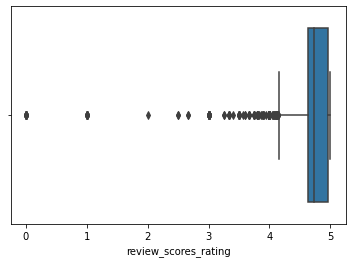

In [201]:
import seaborn as sns
sns.boxplot(df2['review_scores_rating'])

In [202]:
df2=df2[df2['review_scores_rating']>4.5 ]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


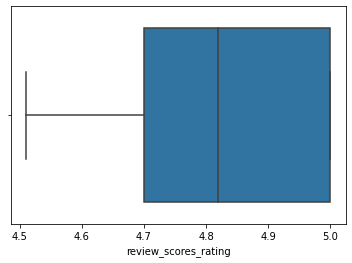

In [203]:
sns.boxplot(df2['review_scores_rating'])

______

**review_scores_cleanliness**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


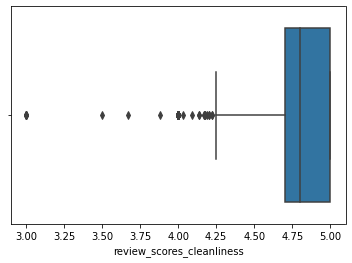

In [204]:
sns.boxplot(df2['review_scores_cleanliness'])

In [205]:
df2=df2[df2['review_scores_cleanliness']>4.5 ]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


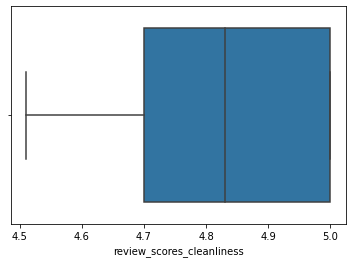

In [206]:
sns.boxplot(df2['review_scores_cleanliness'])

**review_scores_communication**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


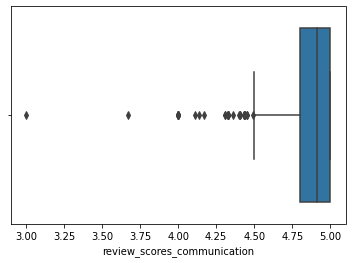

In [207]:
sns.boxplot(df2['review_scores_communication'])

In [208]:
df2=df2[df2['review_scores_communication']>4.5 ]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


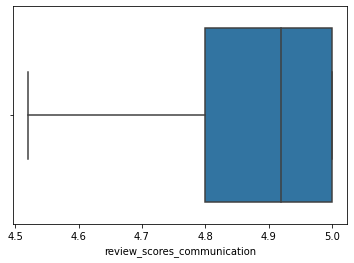

In [209]:
sns.boxplot(df2['review_scores_communication'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


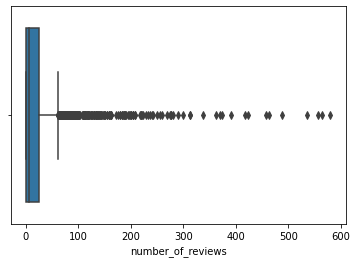

In [210]:
sns.boxplot(df2['number_of_reviews'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


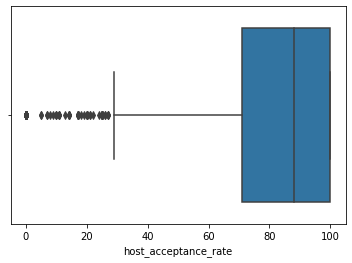

In [211]:
sns.boxplot(df2['host_acceptance_rate'])

In [212]:
Entire=df2[df2['room_type']=='Entire home/apt']
Private=df2[df2['room_type']=='Private room']
Shared=df2[df2['room_type']=='Shared room']
Hotel=df2[df2['room_type']=='Hotel room']

In [213]:
df2['room_type'].value_counts()

Entire home/apt    1700
Private room        737
Hotel room           13
Shared room          10
Name: room_type, dtype: int64

**modelos**

In [235]:
Vars_Indep_E= Entire[['host_acceptance_rate','review_scores_rating','review_scores_cleanliness','review_scores_communication']]
Vars_Indep_P= Private[['host_acceptance_rate','review_scores_rating','review_scores_cleanliness','review_scores_communication']]
Vars_Indep_S= Shared[['host_acceptance_rate','review_scores_rating','review_scores_cleanliness','review_scores_communication']]
Vars_Indep_H= Hotel[['host_acceptance_rate','review_scores_rating','review_scores_cleanliness','review_scores_communication']]
yE= Entire['number_of_reviews']
yP= Private['number_of_reviews']
yS= Shared['number_of_reviews']
yH= Hotel['number_of_reviews']

In [236]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelE= LinearRegression()
modelP= LinearRegression()
modelS= LinearRegression()
modelH= LinearRegression()

In [237]:
type(model)

sklearn.linear_model._base.LinearRegression

In [239]:
modelE.fit(X=Vars_Indep_E, y=yE)
modelP.fit(X=Vars_Indep_P, y=yP)
modelS.fit(X=Vars_Indep_S, y=yS)
modelH.fit(X=Vars_Indep_H, y=yH)

LinearRegression()

In [241]:
modelE.__dict__
modelP.__dict__
modelS.__dict__
modelH.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate', 'review_scores_rating',
        'review_scores_cleanliness', 'review_scores_communication'],
       dtype=object),
 'n_features_in_': 4,
 'coef_': array([  -0.44099731,    3.9495682 ,  203.81668996, -292.64870768]),
 '_residues': 435.8242376735211,
 'rank_': 4,
 'singular_': array([47.50960613,  0.72702188,  0.18488185,  0.12907465]),
 'intercept_': 472.1901377840222}

In [242]:
modelE.score(X=Vars_Indep_E, y=yE)
modelP.score(X=Vars_Indep_P, y=yP)
modelS.score(X=Vars_Indep_S, y=yS)
modelH.score(X=Vars_Indep_H, y=yH)

0.8373323258755159

In [243]:
y_pred= modelE.predict(X=Entire[['host_acceptance_rate','review_scores_rating','review_scores_cleanliness','review_scores_communication']])
y_pred

array([25.263087  , 15.86532196, 21.65983541, ..., 25.64099005,
       23.62733926, 19.80530692])

In [245]:
y_pred1= modelE.predict(X=Private[['host_acceptance_rate','review_scores_rating','review_scores_cleanliness','review_scores_communication']])
y_pred1

array([ 2.52630870e+01,  2.09040293e+01,  1.41779308e+01,  3.10576004e+01,
        7.04758410e+00,  2.16598354e+01,  2.16598354e+01,  2.32265099e+01,
        2.01482232e+01,  1.84608321e+01,  2.52630870e+01,  2.52630870e+01,
        2.92854239e+01,  2.40185813e+01,  2.82836891e+01,  2.01959327e+01,
        2.03398862e+01,  2.56016352e+01,  1.40952611e+01,  2.91000479e+01,
        2.04287148e+01,  1.51677788e+01,  3.28632370e+00,  2.93260859e+01,
        3.12095483e+01,  2.31279683e+01,  2.81395431e+01,  6.07643406e+00,
        2.49913159e+01,  2.11391196e+01,  3.49193894e+01,  2.65322304e+01,
        3.33207747e+01,  3.32257831e+01,  2.60470396e+01,  3.03008030e+01,
        2.38496064e+01,  2.08259469e+01,  1.22037377e+01,  2.04313540e+01,
        3.25662882e+01,  7.26145366e+00,  1.62432250e+01,  1.17669097e+01,
        1.54071301e+01,  1.28340836e+01,  3.45455982e+01,  1.91235475e+01,
        2.16598354e+01,  3.17922548e+01,  2.69533885e+01,  1.37413012e+01,
        1.99074234e+01,  

In [246]:
y_pred2= modelE.predict(X=Shared[['host_acceptance_rate','review_scores_rating','review_scores_cleanliness','review_scores_communication']])
y_pred2

array([25.8184059 , 18.5946153 , 25.64099005,  5.86406372,  5.14607557,
       31.05760044, 31.05760044, 12.05349479, 31.14182559, 33.70688015])

In [262]:
y_pred3= modelE.predict(X=Hotel[['host_acceptance_rate','review_scores_rating','review_scores_cleanliness','review_scores_communication']])
y_pred3

array([21.65983541, 37.52478028, 29.24394118, 29.71539205, 23.72342789,
       20.65157048, 21.65983541, 31.05760044, 21.65983541, 21.65983541,
       31.05760044, 31.05760044, 21.65983541])

In [261]:
#Entire
coef_Deter=modelE.score(X=Vars_Indep_E, y=yE)
coef_Deter

0.04241732466506709

In [263]:
#Entire
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.20595466652898908

In [267]:
# Private 
coef_Deter1=modelE.score(X=Vars_Indep_P, y=yP)
coef_Deter1

0.014221789468182644

In [269]:
coef_Correl1=np.sqrt(coef_Deter1)
coef_Correl1

0.1192551444097178

In [270]:
# Shared
coef_Deter2=modelE.score(X=Vars_Indep_S, y=yS)
coef_Deter2

-0.1637368416571776

In [273]:
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


nan

In [274]:
# Hotel
coef_Deter3=modelE.score(X=Vars_Indep_H, y=yH)
coef_Deter3

-1.4500884949353758

In [275]:
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


nan